In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
data = pd.read_csv('/content/unclean_data_trial.csv', encoding='latin-1')
data.head()

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar?ÿ,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre?ÿ,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter?ÿ,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


In [10]:
data.isnull().sum()

,0
movie_title,0
num_critic_for_reviews,0
duration,3
DIRECTOR_facebook_likes,2
actor_3_facebook_likes,0
ACTOR_1_facebook_likes,0
gross,0
num_voted_users,1
Cast_Total_facebook_likes,2
facenumber_in_poster,5


In [11]:
# Meperbaiki Data Rusak
# Mengganti Salah Satu Karakter
x = "Campus??"
x = x.replace("?","")
print (x)

Campus


In [12]:
data ["movie_title"] = data["movie_title"].str.replace("?","")
data ["movie_title"] = data["movie_title"].str.replace("ÿ","")
data ["title_year.1"] = data["title_year"].copy()
data ["DIRECTOR_facebook_likes"] = data["DIRECTOR_facebook_likes"].str.replace("\"","")
data

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009
1,Pirates of the Caribbean: At World's End,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,2007
2,Spectre,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015
3,The Dark Knight Rises,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,2012
4,John Carter,462,132.0,475,530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,2012
5,Spider-Man 3,392,156.0,23,4000,24000,336530303,383056.0,46055.0,NaN,1902,258000000,2007,11000.0,6.2,2007
6,Tangled,324,NaN,15,284,799,200807262,294810.0,NaN,1.0,387,260000000,2010,553.0,7.8,2010
7,Avengers: Age of Ultron,635,141.0,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,2015
8,Avengers: Age of Ultron,635,141.0,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,2015
9,Harry Potter and the Half-Blood Prince,375,153.0,282,10000,25000,301956980,321795.0,58753.0,3.0,973,250000000,2009,11000.0,7.5,2009


In [13]:



df = pd.DataFrame(data)

# Mengisi nilai yang hilang (NaN)
# Untuk kolom numerik: mengganti NaN dengan nilai rata-rata
df['duration'].fillna(df['duration'].mean(), inplace=True)
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mode()[0], inplace=True)
df['title_year.1'].fillna(df['title_year.1'].mean(), inplace=True)

(df)


,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar,723,178.000000,10,855,1000,760505847,886204.0,4834.0,1.0,3054,237000000,2009,936.0,7.9,2009
1,Pirates of the Caribbean: At World's End,302,150.727273,563,1000,40000,309404152,471220.0,48350.0,1.0,1238,300000000,2007,5000.0,7.1,2007
2,Spectre,602,148.000000,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015
3,The Dark Knight Rises,813,150.727273,22000,23000,27000,448130642,1144337.0,106759.0,1.0,2701,250000000,2012,23000.0,8.5,2012
4,John Carter,462,132.000000,475,530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,2012
5,Spider-Man 3,392,156.000000,23,4000,24000,336530303,383056.0,46055.0,1.0,1902,258000000,2007,11000.0,6.2,2007
6,Tangled,324,150.727273,15,284,799,200807262,294810.0,NaN,1.0,387,260000000,2010,553.0,7.8,2010
7,Avengers: Age of Ultron,635,141.000000,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,2015
8,Avengers: Age of Ultron,635,141.000000,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,2015
9,Harry Potter and the Half-Blood Prince,375,153.000000,282,10000,25000,301956980,321795.0,58753.0,3.0,973,250000000,2009,11000.0,7.5,2009


In [14]:
data.isnull().sum()

,0
movie_title,0
num_critic_for_reviews,0
duration,0
DIRECTOR_facebook_likes,2
actor_3_facebook_likes,0
ACTOR_1_facebook_likes,0
gross,0
num_voted_users,1
Cast_Total_facebook_likes,2
facenumber_in_poster,0


In [15]:
#Mengganti data hilang

#Mengganti "durasi" dengan rata-rata
duration_mean = data['duration'].mean()
data['duration'].fillna(duration_mean, inplace=True)

#Mengganti "facebook like" dengan rata-rata
# Convert to numeric values, handling errors by coercing invalid values to NaN
data['DIRECTOR_facebook_likes'] = pd.to_numeric(data['DIRECTOR_facebook_likes'], errors='coerce')
fblike_mean = data['DIRECTOR_facebook_likes'].mean()
data['DIRECTOR_facebook_likes'].fillna(fblike_mean, inplace=True)

#Mengganti "Num Vote" dengan rata-rata
numvote_mean = data['num_voted_users'].mean()
data['num_voted_users'].fillna(numvote_mean, inplace=True)

#Mengganti "Cast_Total_facebook_likes" dengan rata-rata
casttotal_mean = data['Cast_Total_facebook_likes'].mean()
data['Cast_Total_facebook_likes'].fillna(casttotal_mean, inplace=True)

#Mengganti "facenumber_in_poster" dengan rata-rata
facenumber_mean = data['facenumber_in_poster'].mean()
data['facenumber_in_poster'].fillna(facenumber_mean, inplace=True)

#Mengganti "ACTOR_2_facebook_likes" dengan rata-rata
actor_mean = data['ACTOR_2_facebook_likes'].mean()
data['ACTOR_2_facebook_likes'].fillna(actor_mean, inplace=True)

data

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar,723,178.000000,10.0,855,1000,760505847,8.862040e+05,4834.000000,1.0,3054,237000000,2009,936.000000,7.9,2009
1,Pirates of the Caribbean: At World's End,302,150.727273,563.0,1000,40000,309404152,4.712200e+05,48350.000000,1.0,1238,300000000,2007,5000.000000,7.1,2007
2,Spectre,602,148.000000,20.0,161,11000,200074175,2.758680e+05,11700.000000,1.0,994,245000000,2015,393.000000,6.8,2015
3,The Dark Knight Rises,813,150.727273,22000.0,23000,27000,448130642,1.144337e+06,106759.000000,1.0,2701,250000000,2012,23000.000000,8.5,2012
4,John Carter,462,132.000000,475.0,530,640,73058679,2.122040e+05,1873.000000,1.0,738,263700000,2012,632.000000,6.6,2012
5,Spider-Man 3,392,156.000000,23.0,4000,24000,336530303,3.830560e+05,46055.000000,1.0,1902,258000000,2007,11000.000000,6.2,2007
6,Tangled,324,150.727273,15.0,284,799,200807262,2.948100e+05,44773.583333,1.0,387,260000000,2010,553.000000,7.8,2010
7,Avengers: Age of Ultron,635,141.000000,10.0,19000,26000,458991599,4.626690e+05,92000.000000,4.0,1117,250000000,2015,21000.000000,7.5,2015
8,Avengers: Age of Ultron,635,141.000000,10.0,19000,26000,458991599,4.626690e+05,92000.000000,4.0,1117,250000000,2015,21000.000000,7.5,2015
9,Harry Potter and the Half-Blood Prince,375,153.000000,282.0,10000,25000,301956980,3.217950e+05,58753.000000,3.0,973,250000000,2009,11000.000000,7.5,2009


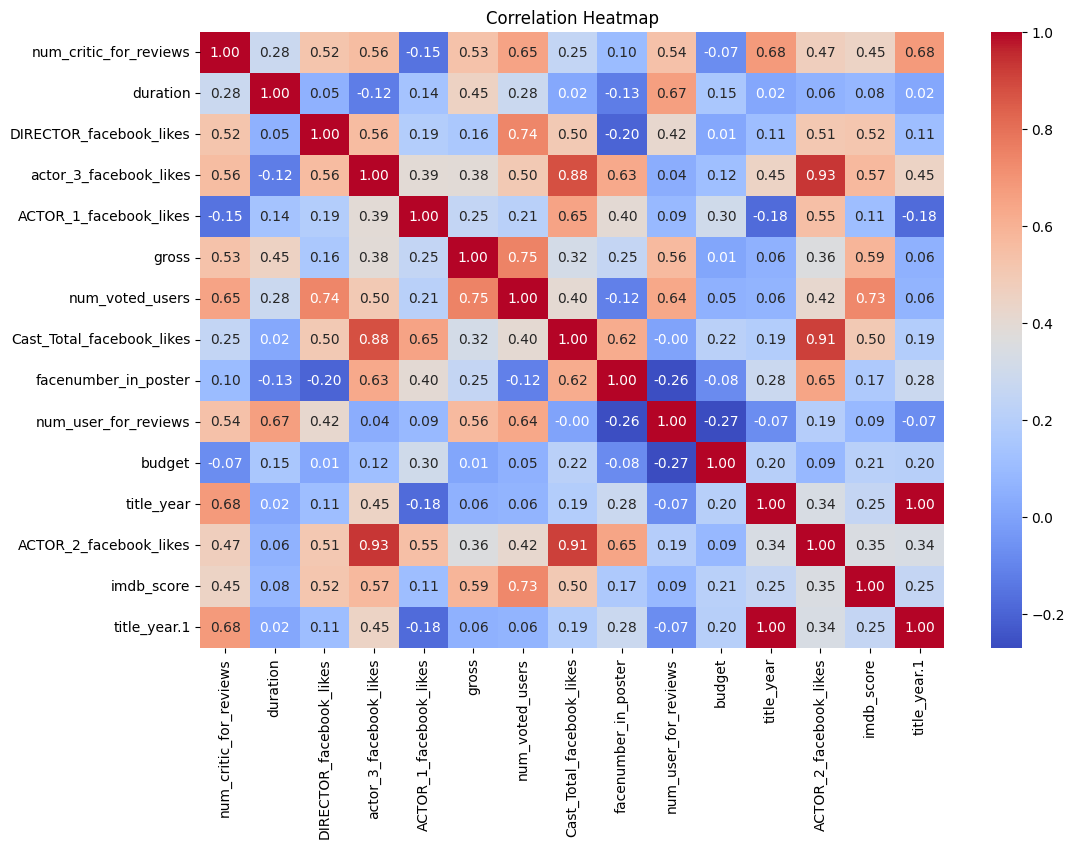

In [16]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X = data.iloc[:,-8]
X.head(10)

,Cast_Total_facebook_likes
0,4834.000000
1,48350.000000
2,11700.000000
3,106759.000000
4,1873.000000
5,46055.000000
6,44773.583333
7,92000.000000
8,92000.000000
9,58753.000000


In [18]:
y = data.iloc[:,-3]
y.head(10)

,ACTOR_2_facebook_likes
0,936.0
1,5000.0
2,393.0
3,23000.0
4,632.0
5,11000.0
6,553.0
7,21000.0
8,21000.0
9,11000.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data here

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11,)
(3,)
(11,)
(3,)


In [21]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [22]:
linear.coef_

array([0.22332237])

In [23]:
linear.intercept_

-1758.1828619471326

In [24]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [25]:
Y_pred

array([11362.67651404,  8240.76001205,  -678.64251127])

In [26]:
y_test

,ACTOR_2_facebook_likes
9,11000.0
11,10000.0
0,936.0


In [27]:
score = r2_score(y_test,Y_pred)
score

0.9051150950617552

Text(0, 0.5, 'ACTOR_2_facebook_likes')

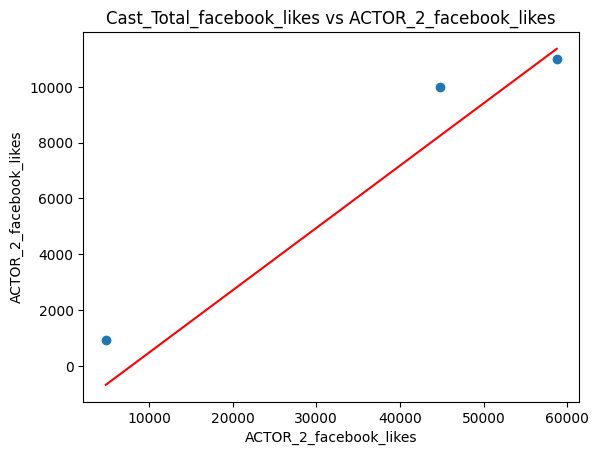

In [30]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('Cast_Total_facebook_likes vs ACTOR_2_facebook_likes')
plt.xlabel('ACTOR_2_facebook_likes')
plt.ylabel('ACTOR_2_facebook_likes')